# Kolmogorov-Smirnov Test (KS-Test) Game
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/ks_test_game.ipynb)

How good are you at comparing distributions with small sample sizes? How good is the KS-Test?

In [1]:
#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import importlib
import scipy.stats as stats
import seaborn as sns

#.............................................
# PLOTTING COMMANDS 
#.............................................
import matplotlib as mpl
# set figure defaults
mpl.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

# np.random.seed(99)
game_round = 0

In [14]:
N = 30

def grab_secret_data(i_type=None):
    
    global game_round
    game_round = game_round + 1 # counter to keep track of how many rounds you have played
    
    if i_type is None:
        i_type = np.random.randint(0,8,size=None)

    if i_type==0 or i_type==1:
        params = [0,1]
        data = np.random.normal(params[0],params[1],size=(N,))
        dist_type = '** standard normal distribution **'
    elif i_type==2:
        params = [np.random.uniform(-3,0),]
        params = np.append(params,-params[0])
        data = np.random.uniform(params[0],params[1],size=(N,))
        dist_type = 'uniform distribution'        
    elif i_type==3:
        params = [np.random.randint(-2,2),np.abs(np.random.normal(0,3))]
        data = np.random.lognormal(params[0],params[1],size=(N,))        
        dist_type = 'lognormal distribution'                
    elif i_type==4:
        params = [np.random.randint(10,20),np.random.randint(10,20)]
        data = np.random.f(params[0],params[1],size = (N,))
        data = data - np.mean(data)
        dist_type = 'f distribution'     
    else:
        params = [np.random.uniform(-.25,.25), 1.]
        data = np.random.normal(params[0],params[1],size = (N,))
        dist_type = 'non-standard normal distribution'     
        
    return data, dist_type, params

# Start the game

For this game, the computer will grab a random sample data set and you need to try and decide whether the sample data came from a standard normal distribution. You will make your decision in two ways:
* look at the distribution and guess
* use the kolmogorov-smirnov test by analyzing the p-value of the maximum difference of a standard normal CDF and the CDF of the sample data

To play the game:
* Step 1: run CELL A below 
* Step 2: decide whether the data came from a standard normal (yes or no)
* Step 3: run CELL B below
* Step 4: look at the resulting statistics/p-value and update your answer accordingly (up to you how you do this)
* Step 5: run CELL C
* Step 6: did the sample data come from a standard normal? make a note of whether you got it right or not.
* Step 7: repeat steps 1-6

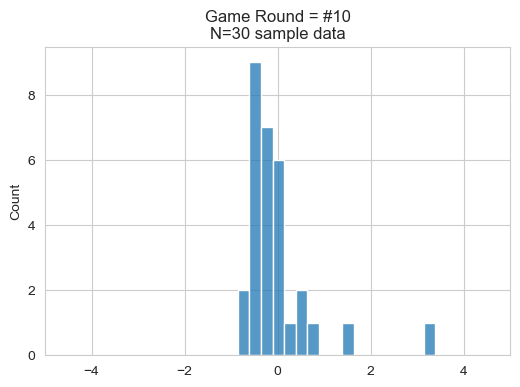

In [24]:
# CELL A
#-----------------
data, dist_type, params = grab_secret_data()

plt.figure()
sns.histplot(data, binwidth=.25)
plt.title('Game Round = #' + str(game_round) + '\nN=' + str(N) + ' sample data')
plt.xlim(-5,5)
plt.show()

In [25]:
# CELL B
#-----------------
# use KS-test to compare our data sample with a TRUE normal
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

D, p = stats.kstest(data,'norm')
if p < 0.05:
    ks_prediction = "NOT standard normal"
else:
    ks_prediction = "** standard normal **"
print('KS-TEST METRICS:\nMaximum difference in CDFs = ' + str(np.round(D,3)) + '\nKS-test p-value = ' + str(np.round(p,6)) + '\nKS Prediction: ' + ks_prediction + '\n')

#-----------------
# print the results/right answer
print('MYSTERY REVEALED:\ndistribution: ' + dist_type + '\nparameters  : ' + str(np.round(params,4)) + '\n')

KS-TEST METRICS:
Maximum difference in CDFs = 0.254
KS-test p-value = 0.034317
KS Prediction: NOT standard normal

MYSTERY REVEALED:
distribution: f distribution
parameters  : [15 19]

